# INF391 - Tarea 7

Comente que algoritmo se comporta mejor y peor en cada conjunto de datos según su criterio. ¿Coincide su apreciación con el resultado que entrega el coeficiente silhouette y la pureza del clustering?.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [42]:
# Métricas de evaluación

# Pureza
def purity_score(y_true, y_pred):   
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)   
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# Coeficiente Silhouette
# metrics.silhouette_score(data, labels, metric='euclidean')
# Las etiquetas (true labels) se encuentran en la última columna del arreglo.

## Data 1

In [43]:
data = genfromtxt('pathbased.txt', delimiter='\t')
clusters = len(set(data[:,2]))
print ('Número de clusters:', clusters)

Número de clusters: 3


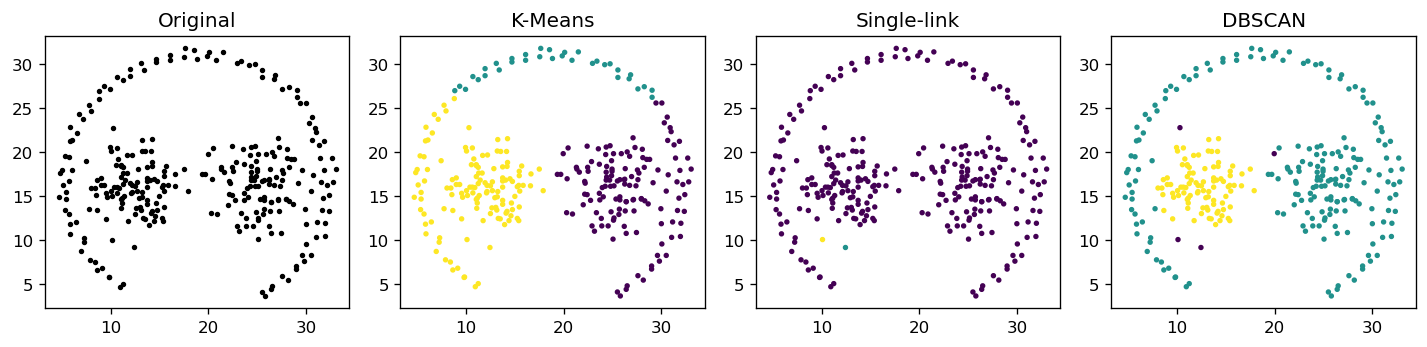

In [44]:
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(data[:,0:2])
hac = AgglomerativeClustering(n_clusters=clusters, linkage='single').fit(data[:,0:2])
dbscan = DBSCAN(eps=2, min_samples=5).fit(data[:,0:2])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,3), dpi=120)
ax1.scatter(data[:, 0], data[:, 1], s=5, c= 'black')  
ax2.scatter(data[:, 0], data[:, 1], s=5, c= kmeans.labels_)  
ax3.scatter(data[:, 0], data[:, 1], s=5, c= hac.labels_)  
ax4.scatter(data[:, 0], data[:, 1], s=5, c= dbscan.labels_)  
ax1.set_title('Original')
ax2.set_title('K-Means')
ax3.set_title('Single-link')
ax4.set_title('DBSCAN')
plt.tight_layout()
plt.show()

In [45]:
pureza_kmeans = purity_score(data[:,2], kmeans.labels_)
pureza_single = purity_score(data[:,2], hac.labels_)
pureza_dbscan = purity_score(data[:,2], dbscan.labels_)

coef_kmeans = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')
coef_single = metrics.silhouette_score(data, hac.labels_, metric='euclidean')
coef_dbscan = metrics.silhouette_score(data, dbscan.labels_, metric='euclidean')

A simple vista considero que K-Means entrega una clusterización mejor que los otros dos, Single-link considera todo como ruido, mientras que DBSCAN deja un par de puntos muy arbitrarios como ruido.

In [46]:
print("Pureza Kmeans: ", pureza_kmeans)
print("Pureza Single Link: ", pureza_single)
print("Pureza DBSCAN: ", pureza_dbscan)

Pureza Kmeans:  0.7433333333333333
Pureza Single Link:  0.37333333333333335
Pureza DBSCAN:  0.6866666666666666


In [47]:
print("Coeficiente Silhouette Kmeans: ", coef_kmeans)
print("Coeficiente Silhouette Single Link: ", coef_single)
print("Coeficiente Silhouette DBSCAN: ", coef_dbscan)

Coeficiente Silhouette Kmeans:  0.5400868526613694
Coeficiente Silhouette Single Link:  -0.0487658172105926
Coeficiente Silhouette DBSCAN:  0.17276570072193043


Evaluando los clusters generador utilizando el coeficiente Silhouette y pureza se da a conocer que KMeans es el que genera los cluster de forma mas correcta, sin embargo, según el coeficiente Silhouette no entrega una clusterización demasiado correcta, no así como indica el grado de pureza, cabe mencionar que el grado de pureza de DBSCAN es bastante alto, tanto como KMeans, sin embargo, el cieficiente de silhoutte es muy bajo, provocando que KMeans sea mejor.

## Data 2

In [48]:
data = genfromtxt('Compound.txt', delimiter='\t')
clusters = len(set(data[:,2]))
print ('Número de clusters:', clusters)

Número de clusters: 6


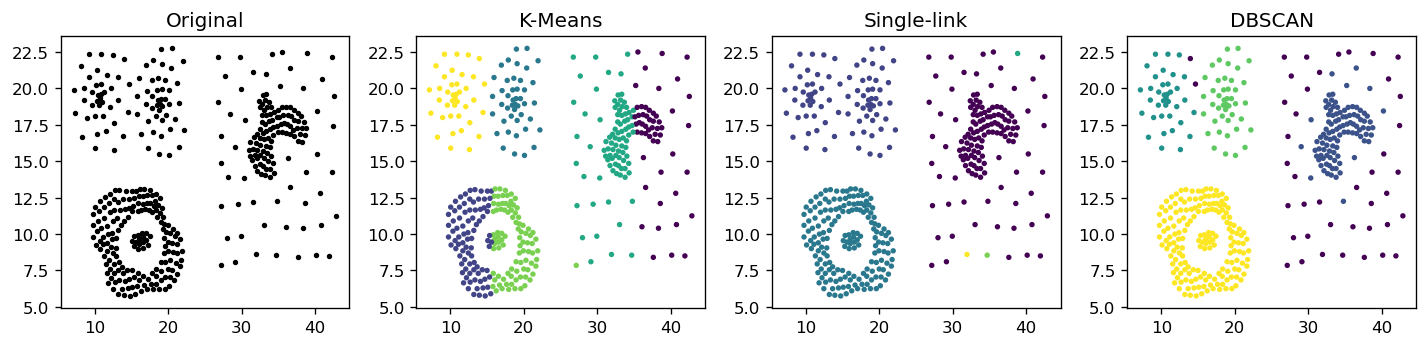

In [49]:
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(data[:,0:2])
hac = AgglomerativeClustering(n_clusters=clusters, linkage='single').fit(data[:,0:2])
dbscan = DBSCAN(eps=2, min_samples=8).fit(data[:,0:2])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,3), dpi=120)
ax1.scatter(data[:, 0], data[:, 1], s=5, c= 'black')  
ax2.scatter(data[:, 0], data[:, 1], s=5, c= kmeans.labels_)  
ax3.scatter(data[:, 0], data[:, 1], s=5, c= hac.labels_)  
ax4.scatter(data[:, 0], data[:, 1], s=5, c= dbscan.labels_)  
ax1.set_title('Original')
ax2.set_title('K-Means')
ax3.set_title('Single-link')
ax4.set_title('DBSCAN')
plt.tight_layout()
plt.show()

Para este caso, considero que DBSCAN entrega una clusterización mas precisa, debido a la densidad de los datos, KMeans, como es bien sabido, no es capaz de detectar el "anillo" presente en la parte inferior izquierda de la imagen, y single link detecta demasiado ruido, DBSCAN detecta de mejor manera la densidad de los datos.

In [50]:
pureza_kmeans = purity_score(data[:,2], kmeans.labels_)
pureza_single = purity_score(data[:,2], hac.labels_)
pureza_dbscan = purity_score(data[:,2], dbscan.labels_)

coef_kmeans = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')
coef_single = metrics.silhouette_score(data, hac.labels_, metric='euclidean')
coef_dbscan = metrics.silhouette_score(data, dbscan.labels_, metric='euclidean')

In [51]:
print("Pureza Kmeans: ", pureza_kmeans)
print("Pureza Single Link: ", pureza_single)
print("Pureza DBSCAN: ", pureza_dbscan)

Pureza Kmeans:  0.8320802005012531
Pureza Single Link:  0.7468671679197995
Pureza DBSCAN:  0.9273182957393483


In [52]:
print("Coeficiente Silhouette Kmeans: ", coef_kmeans)
print("Coeficiente Silhouette Single Link: ", coef_single)
print("Coeficiente Silhouette DBSCAN: ", coef_dbscan)

Coeficiente Silhouette Kmeans:  0.43177907657182585
Coeficiente Silhouette Single Link:  0.36410840384111254
Coeficiente Silhouette DBSCAN:  0.4637174541743397


En este caso, tanto KMeans como DBSCAN entregan una clusterización parecida en téminos de calidad, tanto su grado de pureza como coeficiente de silhoutte son muy parecidos aunque no demasiado elevados, con respecto a las primera imagenes analizadas en este caso los 3 algoritmos utilizados no se diferencian demasiado entre ellos. Sin embargo, DBSCAN entrega mejores resultados.